<a href="https://colab.research.google.com/github/nmwiley808/csci167/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [49]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [50]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [51]:
# Define 1D linear regression model

def f(x, phi0, phi1):

  # SOLUTION: Linear regression model: y = y = φ0 + φ1 x

  y = phi0 + phi1 * x
  return y

In [52]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

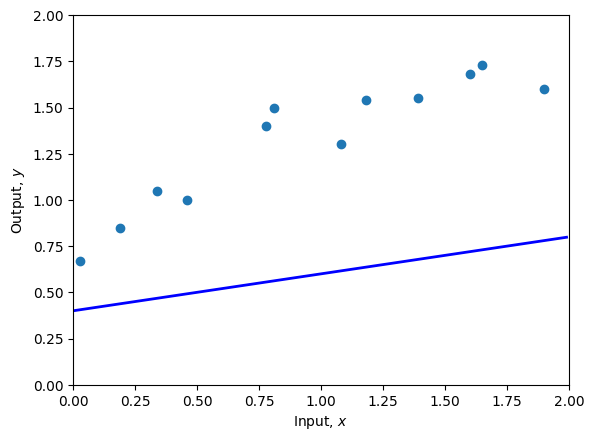

In [53]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [6]:
# Function to calculate the loss

def compute_loss(x,y,phi0,phi1):

  # SOLUTION: Sum of squared errors
  # L(φ0, φ1) = Σ_i (f(x_i; φ0, φ1) - y_i)^2

  residuals = f(x, phi0, phi1) - y
  loss = np.sum(residuals**2)
  return loss


In [55]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 0.00, Ground truth =7.07


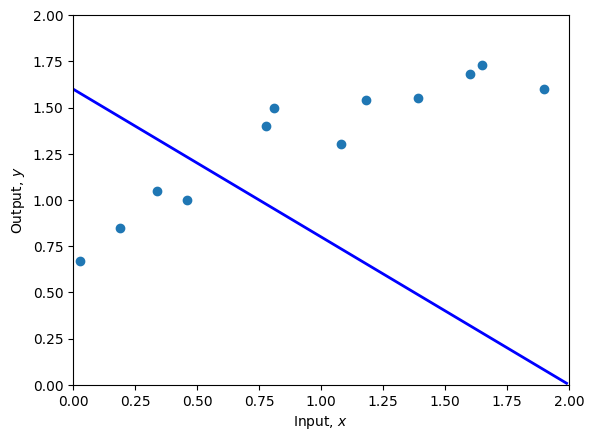

Your Loss = 0.00, Ground truth =10.28


In [56]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

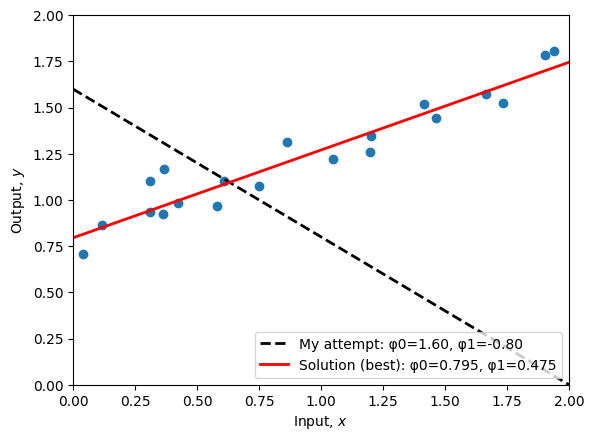

My loss = 14.47  <-- My attempt
Solution loss = 0.16  <-- Best fit (grid search)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

try:
    x, y
except NameError:
    np.random.seed(42)
    N = 20
    x = np.random.uniform(0.0, 2.0, N)
    y = 0.5 * x + 0.8 + 0.1 * np.random.normal(0.0, 1.0, N)
try:
    f
except NameError:
    def f(x, phi0, phi1):
        # SOLUTION: Linear regression model (eq. 2.4): y = φ0 + φ1 x
        return phi0 + phi1 * x

try:
    compute_loss
except NameError:
    def compute_loss(x, y, phi0, phi1):
        # SOLUTION: Sum of squared errors (eq. 2.5)
        residuals = f(x, phi0, phi1) - y
        return np.sum(residuals**2)

# 1) My Attempt
phi0_init = 1.60
phi1_init = -0.8

# 2) Grid search for best fit
phi0_vals = np.linspace(0.0, 2.0, 401)
phi1_vals = np.linspace(-1.0, 1.0, 401)
best = {'phi0': None, 'phi1': None, 'loss': np.inf}

for a in phi0_vals:
    for b in phi1_vals:
        L = compute_loss(x, y, a, b)
        if L < best['loss']:
            best.update({'phi0': float(a), 'phi1': float(b), 'loss': float(L)})

# 3) Plot data + both lines
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim([0, 2.0])
ax.set_ylim([0, 2.0])
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')

x_line = np.linspace(0, 2, 100)

# My attempt
y_line_init = f(x_line, phi0_init, phi1_init)
ax.plot(x_line, y_line_init, 'k--', lw=2,
        label=f"My attempt: φ0={phi0_init:.2f}, φ1={phi1_init:.2f}")

# Solution
y_line_best = f(x_line, best['phi0'], best['phi1'])
ax.plot(x_line, y_line_best, 'r-', lw=2,
        label=f"Solution (best): φ0={best['phi0']:.3f}, φ1={best['phi1']:.3f}")

ax.legend(loc='lower right')
plt.show()

# 4) Print losses with explicit labels
print(f"My loss = {compute_loss(x, y, phi0_init, phi1_init):.2f}  <-- My attempt")
print(f"Solution loss = {best['loss']:.2f}  <-- Best fit (grid search)")

# 5) Carry best fit forward
phi0, phi1 = best['phi0'], best['phi1']




# Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

In [58]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


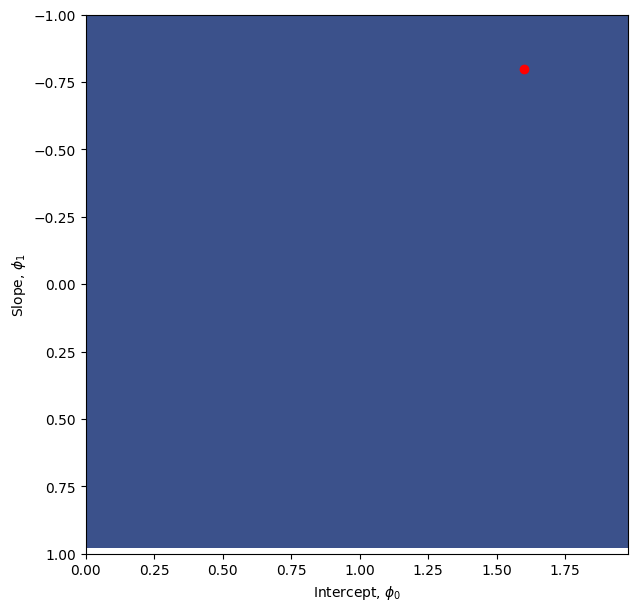

In [59]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()